# Лабораторна робота №2

### Студентки групи МІТ-31 (підгрупа 2)

### Булгакової Анни Юріївни 

## Завдання
  

**Частина 1: Регресія на згенерованому наборі даних**

1. Згенеруйте набір даних для регресії за допомогою `sklearn.datasets.make_regression` (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

2. Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

3. Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

**Частина 2: Аналіз часових даних**

1. Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

2. Завантажте та візуалізуйте ці дані. Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

3. Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.



**Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv** (виконується тільки для отримання високої оцінки).

1. Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

2. Вивчіть структуру даних та характеристики ознак. Визначте цільову змінну для регресії (наприклад, ціну житла).

3. Виконайте підготовку даних, таку як обробка відсутніх значень, перетворення категоріальних ознак у числові, масштабування тощо.

4. Побудуйте модель регресії на підготовлених даних і оцініть її точність.



**Загальні вимоги:**

- Для кожної частини лабораторної роботи, зробіть відповідний аналіз та виведіть результати у вигляді коду та текстового опису.

- Включіть візуалізації, які допоможуть вам легше розуміти дані та результати моделювання.

- Зробіть висновки для кожної частини лабораторної роботи та підсумовуйте результати.

- Надайте відповіді на запитання та обговорення у текстовому вигляді.

- Забезпечте чітку організацію вашого коду та коментарі до нього.

In [24]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

*Завдання 1*

In [20]:
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=5, random_state=42) # генеруємо набір даних для регресії

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # розділяємо дані на навчальний та тестовий набори (80% - 20%)

regressor = LinearRegression() # будуємо модель регресії (лінійну регресію)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) # прогнози на тестових даних

mse = mean_squared_error(y_test, y_pred) # оцінюємо точність моделі за допомогою середньоквадратичної похибки та R-квадрат
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична похибка: {mse}")
print(f"R-квадрат: {r2}")

Середньоквадратична похибка: 24.06565177399128
R-квадрат: 0.9912110533464835


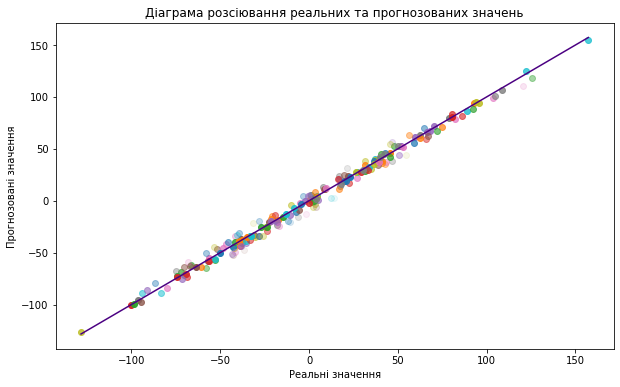

In [21]:
# Розрахувати відстані між реальними та прогнозованими значеннями
distance = np.abs(y_test - y_pred)
max_distance = np.max(distance)

plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  # Прозорість в залежності від відстані
    plt.scatter(y_test[i], y_pred[i], alpha=alpha)

plt.title('Діаграма розсіювання реальних та прогнозованих значень')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='indigo')
plt.show()

згідно метрикам наша модель показала досить добрі результати

*Завдання 2*

In [24]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [25]:
df.columns = ['Date','Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


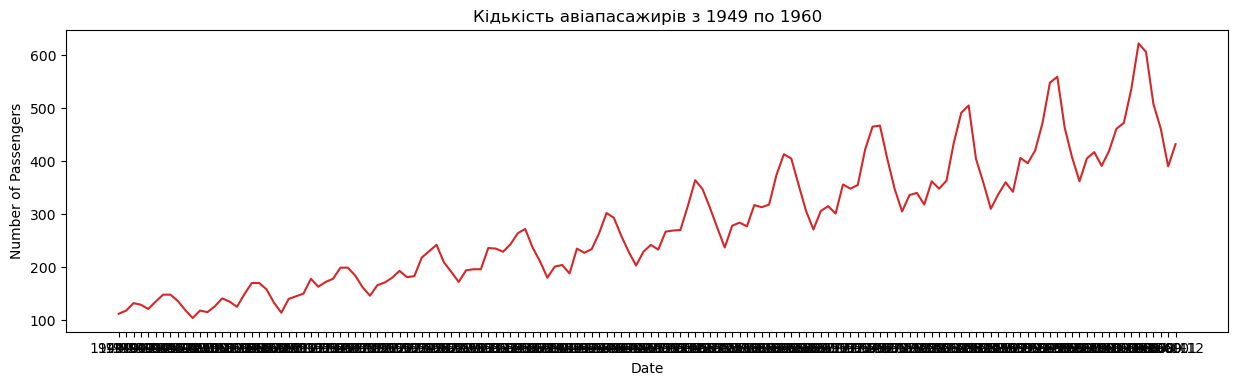

In [26]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Кідькість авіапасажирів з 1949 по 1960')

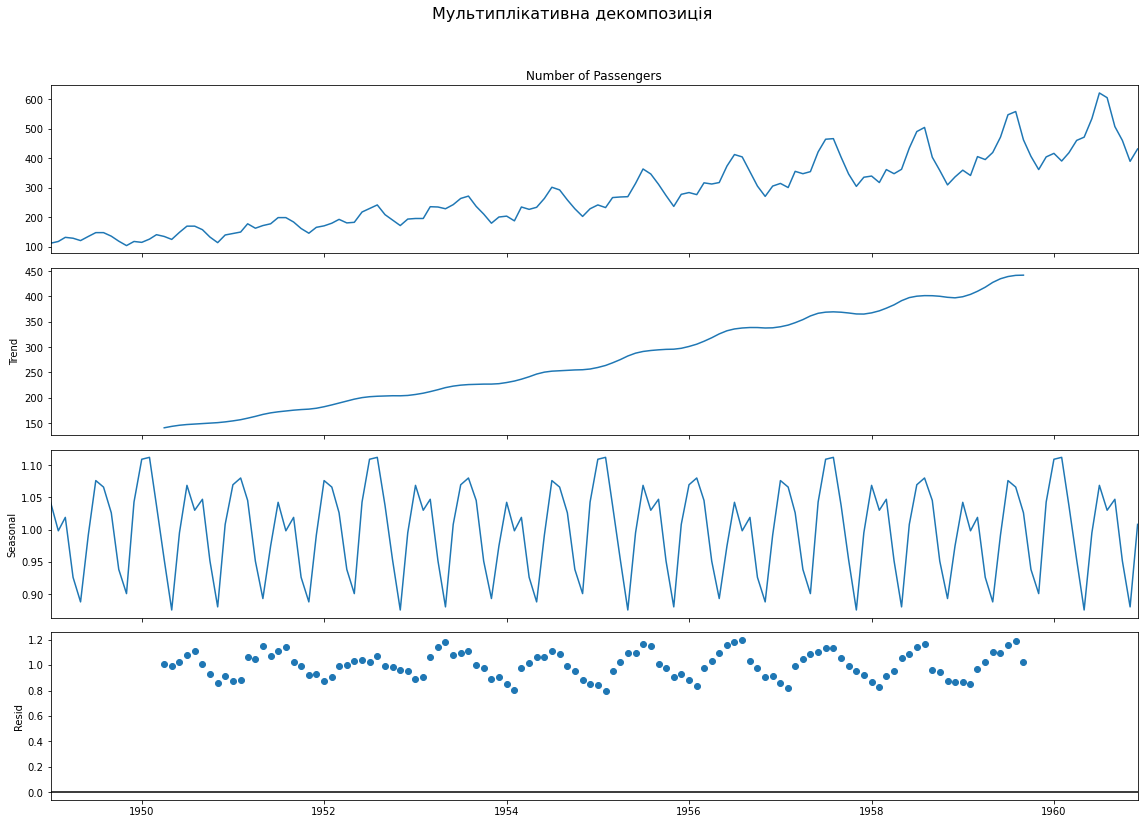

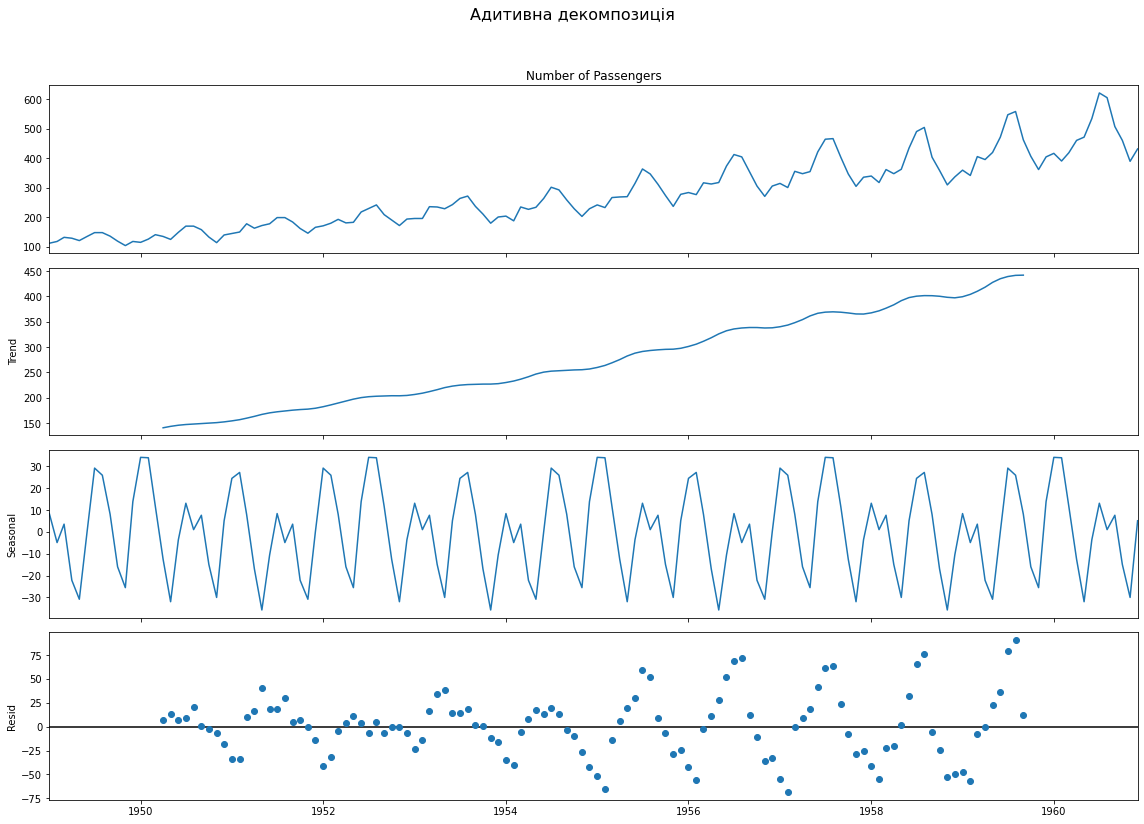

In [55]:
# Розділення часового ряду на тренд, сезонні та залишкові компоненти

# Мультиплікативна декомпозиція
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Адитивна декомпозиція
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Взуалізація
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Мультиплікативна декомпозиція', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Адитивна декомпозиція', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

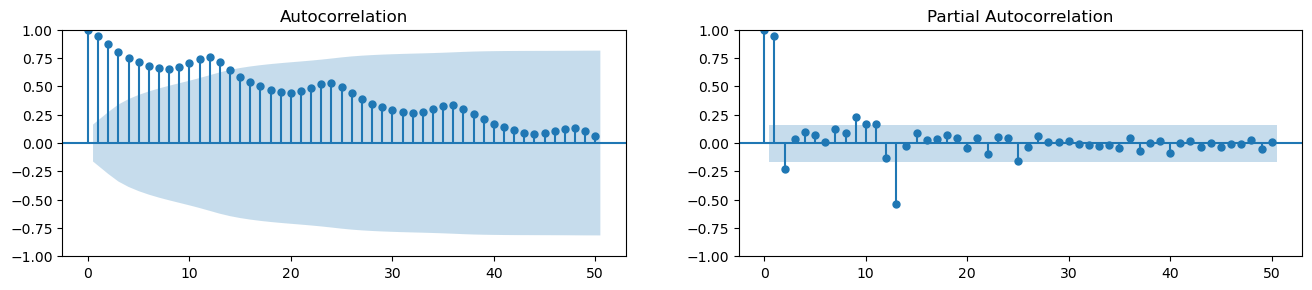

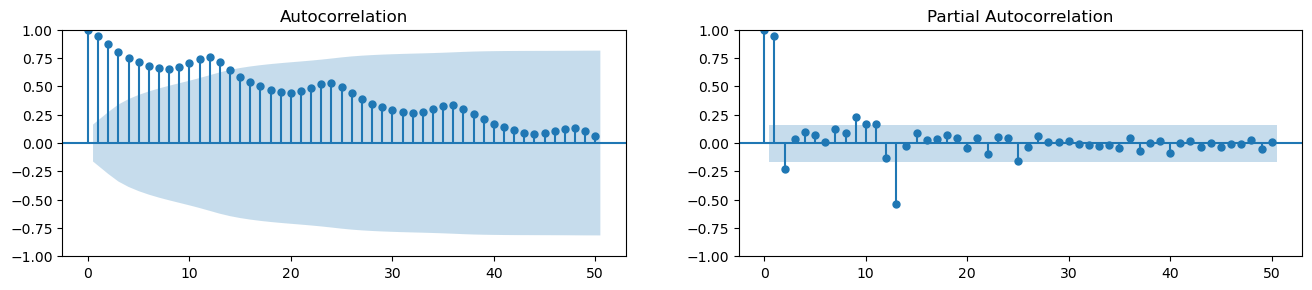

In [61]:
# будуємо функцію автокореляції (ACF) і функцію часткової автокореляції (PACF)
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

In [41]:
# ADF Test - перевірка стаціонарності часового ряду
result = adfuller(df, autolag='AIC')
print(f'ADF-статистика: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Критичні значення:')
    print(f'{key}, {value}')

ADF-статистика: 0.8153688792060482
p-value: 0.991880243437641
Критичні значення:
   1%, -3.4816817173418295
Критичні значення:
   5%, -2.8840418343195267
Критичні значення:
   10%, -2.578770059171598


<AxesSubplot:xlabel='Date'>

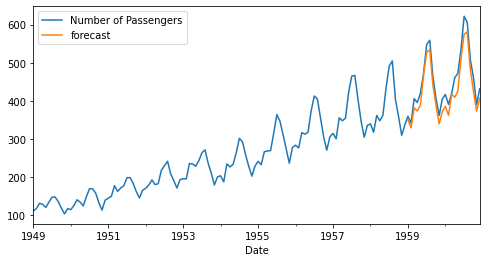

In [79]:
# Побудова моделі SARIMAX, обрала її, бо вона вміє працювати з трендом, сезонністю та екзогенного(зовнішнього) впливу
model = sm.tsa.SARIMAX(df['Number of Passengers'], order=(2,1,2), seasonal_order=(2,1,2,12))
results = model.fit()

df['forecast'] = results.predict(start=120, end=144, dynamic=True)
df[['Number of Passengers', 'forecast']].plot(figsize=(8, 4))

In [84]:
# Оцінка точності моделі
mse = mean_squared_error(df['Number of Passengers'][120:], df['forecast'][120:])
mae = mean_absolute_error(df['Number of Passengers'][120:], df['forecast'][120:])

print(f'Середньоквадратична помилка MSE: {mse}')
print(f'Середньоабсолютна помилка MAE: {mae}')

Середньоквадратична помилка MSE: 771.1888443942108
Середньоабсолютна помилка MAE: 25.07744098094048


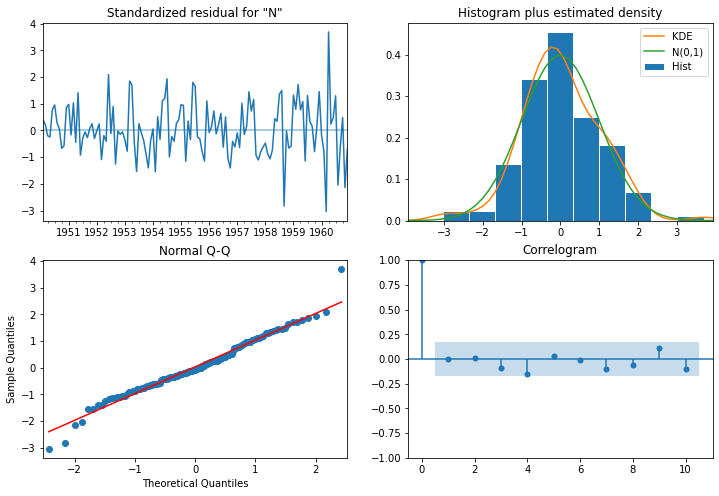

In [47]:
# Діагностика моделі
results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [48]:
# Прогнозування майбутніх значень
forecast_steps = 12  # Кількість майбутніх кроків для прогнозу
forecast = results.get_forecast(steps=forecast_steps)

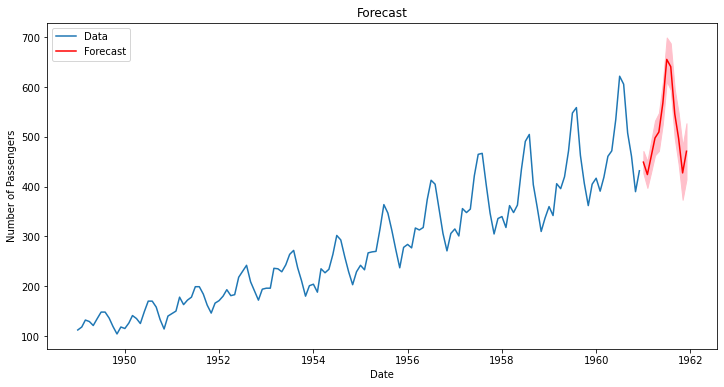

In [53]:
# Відображення прогнозів та довірчих інтервалів
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(df, label='Data')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Проаналізувавши свої дані, на наявність сезоності, тренду та екзогеногу вплипу, я обрала найбільш вдалу модель для навчання (сарімакс, вище в коментарях, де використовувала, зазначила чому її). Тому маю досить добрі результати навчання, на що вказують перевірені метрики

*Завдання 3*

In [3]:
data = pd.read_csv('AmesHousing.csv')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [6]:
# Видаляємо колонки з даними, у яких дуже замало відомих значень (< 10%) для заповнення інших
data = data.drop(['Mas Vnr Type','Mas Vnr Area','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','Lot Frontage','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Electrical','Bsmt Full Bath','Bsmt Half Bath','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond'], axis=1)

In [7]:
#переводимо категорійні дані в числові використовуючи метод One-Hot Encoding
encodedh_data = pd.get_dummies(data)
encodedh_data

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,31770,6,5,1960,1960,1656,0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,11622,5,6,1961,1961,896,0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,14267,6,6,1958,1958,1329,0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,11160,7,5,1968,1968,2110,0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,13830,5,5,1997,1998,928,701,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,7937,6,6,1984,1984,1003,0,...,0,0,0,1,0,0,0,0,1,0
2926,2927,923276100,20,8885,5,5,1983,1983,902,0,...,0,0,0,1,0,0,0,0,1,0
2927,2928,923400125,85,10441,5,5,1992,1992,970,0,...,0,0,0,1,0,0,0,0,1,0
2928,2929,924100070,20,10010,5,5,1974,1975,1389,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# Відокремлення цільової зміної
X_h = encodedh_data.drop(['SalePrice'], axis=1)
y_h = encodedh_data['SalePrice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

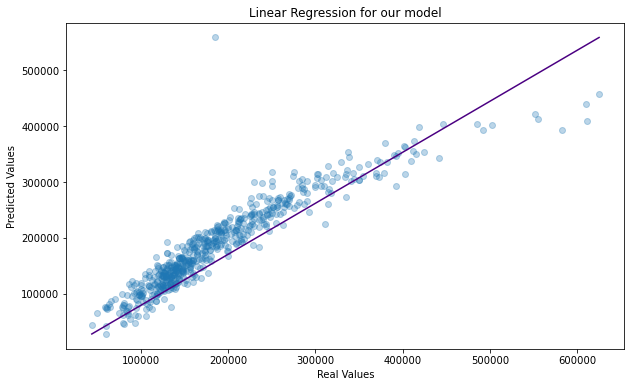

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.title("Linear Regression for our model")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred, alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], c ='indigo')

plt.show()

In [22]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f" MSE = {mse:.2f}, R^2 = {r2:.2f}")

 MSE = 1041019458.94, R^2 = 0.87


 MSE = 1118801720.06, R^2 = 0.86


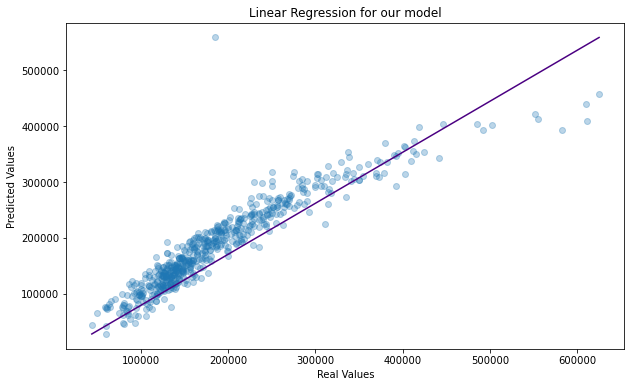

In [37]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

#Переводимо категорійні дані в числові використовуючи метод label_encoder
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

#Заповнення відсутніх значень середніми
X.fillna(X.mean(), inplace=True)   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f" MSE = {mse:.2f}, R^2 = {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.title("Linear Regression for our model")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred, alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], c ='indigo')

plt.show()


Я використала два методи для переводення категорійних даних у числові (label_encoder та One-Hot Encoding), щоб зрівняти їх, і зрозуміла те, що метод One-Hot Encoding він також, якщо є пропущені значення, серед тих даних, які треба було перевести, одразу їх заповнює, а так як пропущені значення в нас мали тільки категоріні ознаки, то в першому випадку не довелося використовувати додадкові операції над даними, щоб заповнити пропущені значення. метод label_encoder як я й думала, показав гірші результати до того ж там потрібно було заповнювати пропущені значення (заповнила середнім). Згідно метрикам дві ці моделі мають непогані результати навчання проте, модель навчена на даних, з використанням label_encoder та заміною пропущених значень на середні, покзала трохи гірший результат чим модель навчена на даних, які переводилися за допомогою методу One-Hot Encoding